In [1]:
import numpy as np
from dataclasses import dataclass
import json
import glob
from ase.calculators.calculator import Calculator
from sch_benchmark.infer import compute_hutchison, compute_ionic_conformers, compute_rotamer, compute_tautobase, compute_all
from sch_benchmark.io import load_hutchison_task, load_ionic_conformers_task
from sch_benchmark.analysis import analyse_hutchison, analyse_ionic_conformers, analyse_rotamer, analyse_tatobase
import matplotlib.pyplot as plt


class FakeCalc(Calculator):

    def get_potential_energy(self, atoms, force_consistent=None):
        return 0.0

    def get_forces(self, atoms=None):
        return np.zeros((len(atoms), 3))

In [2]:
calc = FakeCalc()

from sch_benchmark.hutchison import Hutchison

In [3]:
hutchison = Hutchison()

In [4]:
hutchison.inference("Fake", calc)

376/5958 data remain after filtering


/Users/xinyan/miniconda3/envs/dpforce/lib/python3.10/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/xinyan/miniconda3/envs/dpforce/lib/python3.10/site-packages/numpy/lib/function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


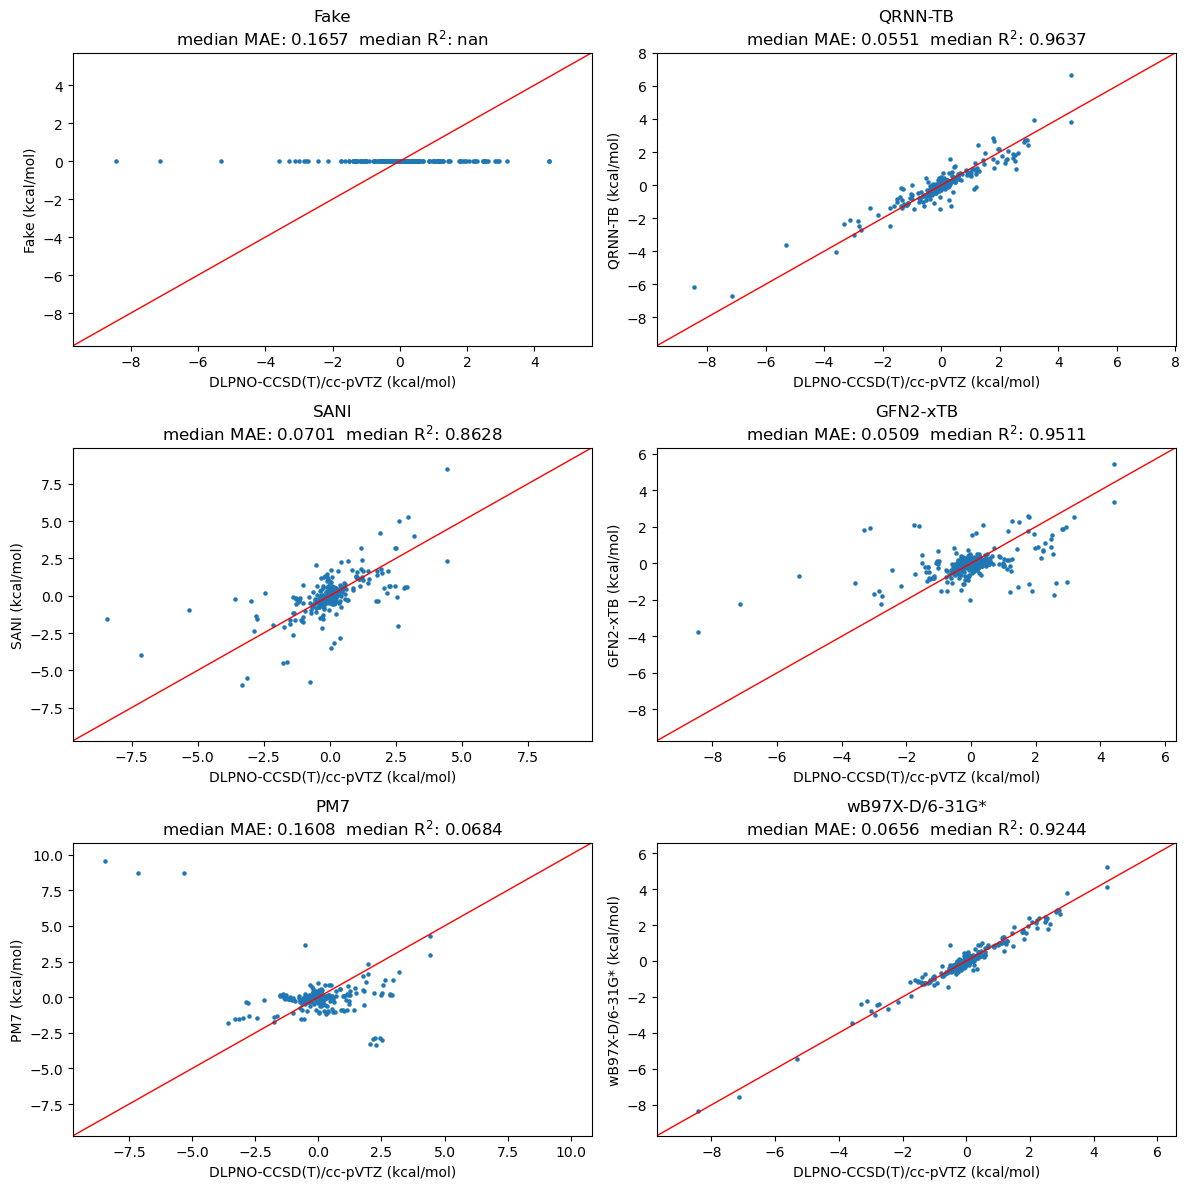

In [5]:
filter = lambda x: x.charge != 0

hutchison.analyse(methods=["Fake", "QRNN-TB", "SANI", "GFN2-xTB", "PM7", "wB97X-D/6-31G*"], filter=filter)

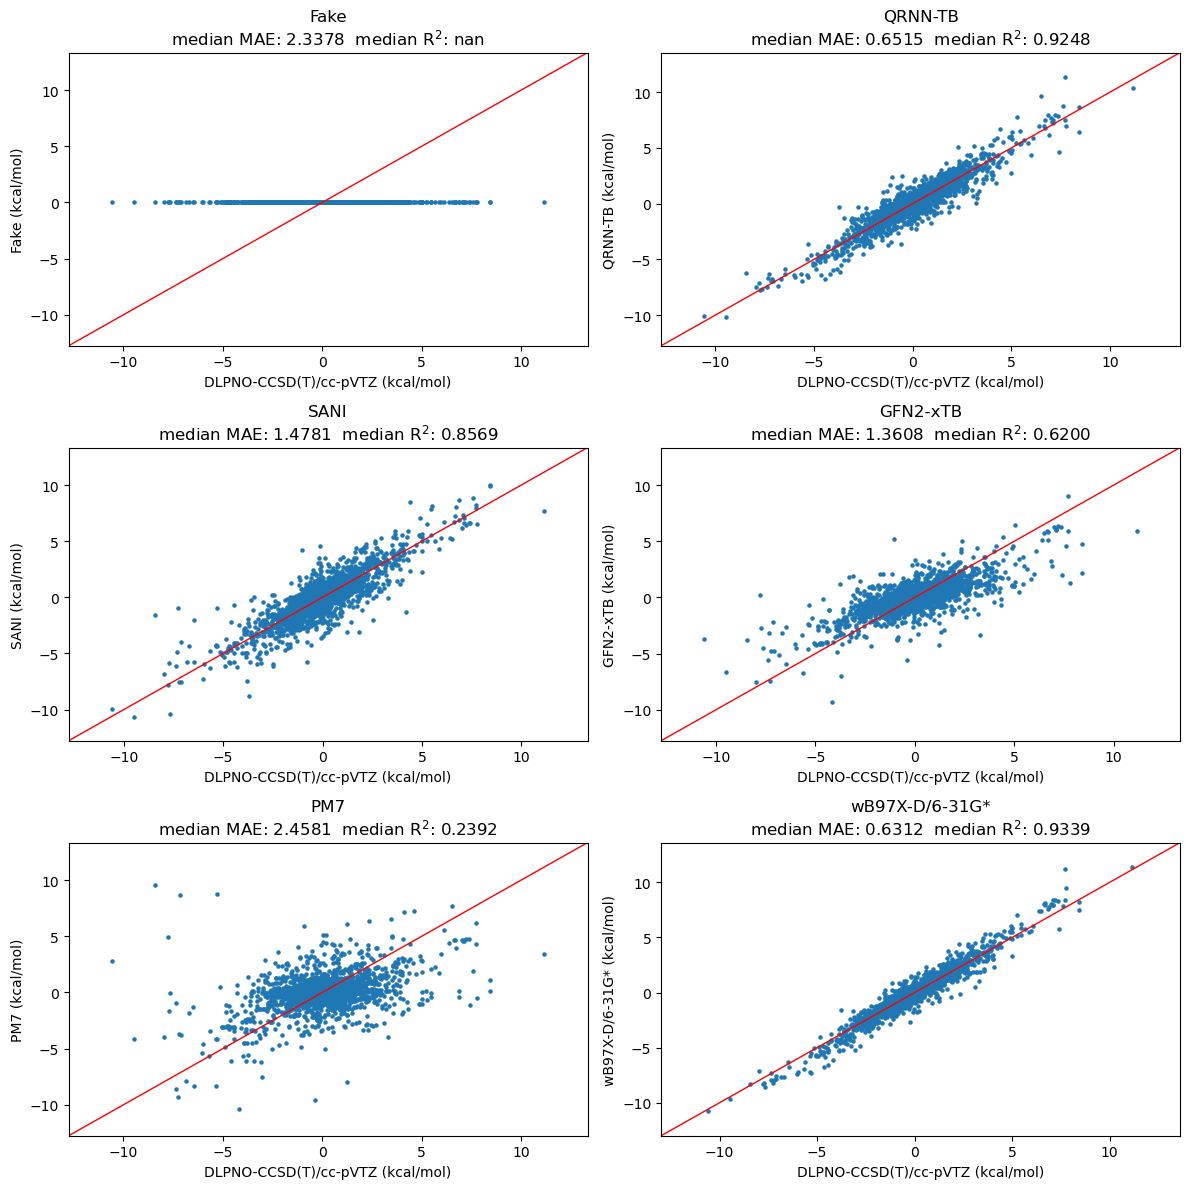

In [6]:
hutchison.analyse(methods=["Fake", "QRNN-TB", "SANI", "GFN2-xTB", "PM7", "wB97X-D/6-31G*"])

In [7]:
import pickle

In [8]:
with open("test.pkl", "wb") as f:
    pickle.dump(hutchison, f)